In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, Conv2DTranspose
import numpy as np
## Forward conv
in_filt = 3
out_filt = 32
kernel_size = 3
strides = 4
padding = "valid"
dilation_rate = 1

x = np.random.randn(32, in_filt, 128, 128) # batch, channels, height, width
c = Conv2D(filters=out_filt, kernel_size=kernel_size, strides=strides, padding=padding, data_format="channels_first", dilation_rate=dilation_rate)
o = c(x)

print(f"NConv input: {x.shape} with filters={out_filt}, kernel_size={3}, strides={strides}, padding={padding}, dilation_rate={dilation_rate}, output: {o.shape}")

## Transpose conv
ct = Conv2DTranspose(filters=in_filt, kernel_size=kernel_size, strides=strides, padding=padding, data_format="channels_first", dilation_rate=dilation_rate)
oo = ct(o)
print(f"TConv input: {o.shape} with filters={in_filt}, kernel_size={3}, strides={strides}, padding={padding}, dilation_rate={dilation_rate}, output: {oo.shape}")

## Problem Statement
- You are working as Data scientist in HDFC bank.   
  - You have a new account holder in your bank and would like to set his signature for verification. 
- You have only one sample signature from the member.  
- Being a DataScientist , How can you use a neural network to perform the signature verification?

<center><img src = 'https://drive.google.com/uc?id=1wcp9rW4zygc8UYb6KgGz_jGT7oYt7Cf1' height=300 width=400>

### **TASK:** Verify whether a Signature of a person is Genuine or Forged

### What is the difference between Image Classification and Image verification?

- Identifying the class of object present in the image is called as **Image Classification**

- Checking whether a image is matching with another image is called as **Image verification**

### Can we use Traditional CNN (Convolutional Neural Networks) to solve this task?

- Let us assume we have a company of 1000 employees.
- We decide to implement a facial recognition system(**is an important computer vision task that allows us to identify and verify a person’s identity**.)  to record the attendance of your employees.
- If we were to use traditional neural networks, we will have to face two main problems
 - First one would be the dataset.
 - It would be nearly impossible to assemble a huge collection of dataset from each of our employees.
 - But a traditional CNN won’t be able to learn features with such small collection.

- We’ll also end up with 1000 output classes
- Let’s consider that somehow we got a huge dataset from each of our employees and we trained a really good CNN model.

####**What happens when a new employee joins our organization? How can we include the person into our facial recognition system?**

- For example, if a new person is added to the database, we will have to re-train the identification system built for K classes on the new K+1 classes from scratch. 
- This is because previously, the classifier had K neurons, and now we need a classifier with K+1 neurons. 
- This inhibits the efficiency and scalability of the system, as every time a new face is added, the entire training procedure has to be repeated.



All these shortcomings can be overcome using a new architecture known as **siamese networks** architecture or **One-shot learning** architecture.

### Identification v/s Verification

#### **Quiz-1**
Face verification requires comparing a new picture against one person’s face, whereas face identification requires comparing a new picture against K person’s faces.

> (a) True

> (b) False

**Ans:** (a) True


### Face Identification:
 Can the system predicts who this persom may be?


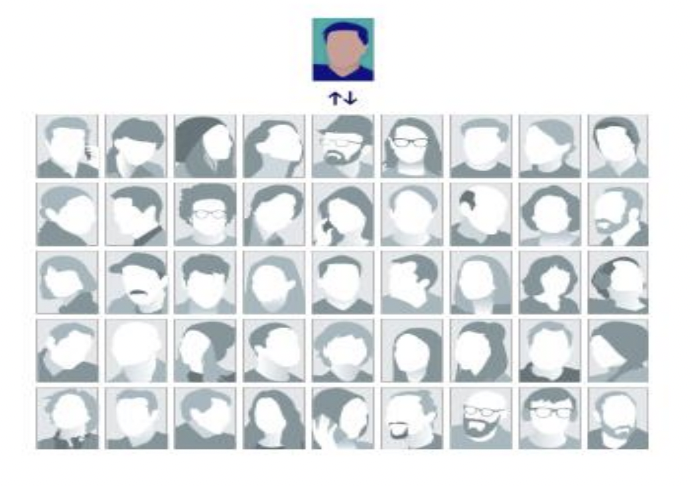

###Face Verification:
Can the system verify that this person is who they say they are

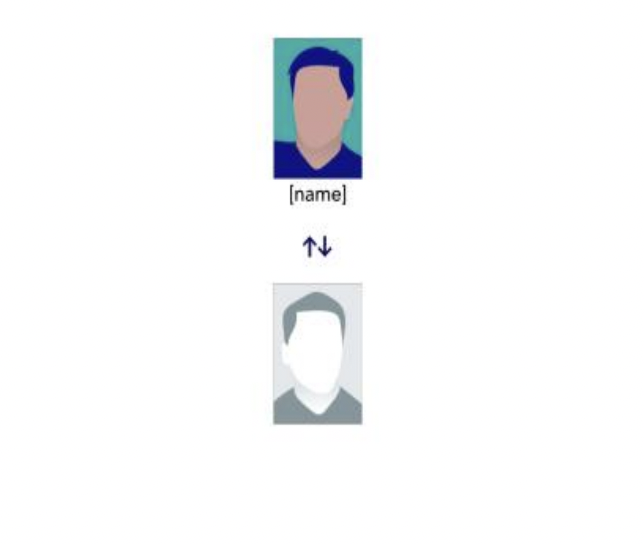

## What is a Siamese Network?
   - https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf

<center> <img src='https://drive.google.com/uc?id=1oPZvZ9wRBlY-py8aCb80YsbNvt0tDtIc' width=600 height=400>


- A **Siamese neural network** is an artificial neural network that contains two or more identical subnetwork which is also known as **twin neural network** or **sister network**.


- Siamese network takes two different inputs passed through two similar subnetworks with the same architecture, parameters, and weights.
- It is used to find the similarity of the inputs by comparing its feature vectors, so these networks are used in many applications
- These networks are used to find the similarity of the inputs by comparing their feature vectors (feature embeddings).
- The two subnetworks are a mirror image of each other, just like the Siamese twins. Hence, any change to any subnetworks architecture, parameter, or weights is also applied to the other subnetwork.
- The two subnetwork outputs an encoding to calculate the difference between the two inputs.


### Why is Siamese Neural Network called One-shot Classification?

<center><img src='https://drive.google.com/uc?id=179PPEH5yS05ra6OFnKOOlGIcvrqTM7nw' width=400 height=300>


- A one-shot classification model correctly makes predictions with just a single training example of each new class.

- Siamese network uses a supervised training approach to learn generic input features then, based on the training data, it makes predictions about unknown class distributions.

- Trained Siamese network uses one-shot learning to predict the similarity or dissimilarity between two inputs even when very few examples from these new distributions are available.


### What should be the loss function for siamese network?

- Siamese network’s objective is to classify if the two inputs are the same or different using the Similarity score.
- The Similarity score can be calculated using Binary cross-entropy, Contrastive function, or Triplet loss, which are techniques for the general distance metric learning approach.
- Since training of Siamese networks involves pairwise learning usual, Cross entropy loss cannot be used in this case, mainly two loss functions are used, they are
 - **Contrastive loss**
   - In Contrastive loss, pairs of images are taken. For same class pairs, distance is less between them.
   - For different pairs, distance is more. Although binary cross-entropy seems like a perfect loss function for our problem, the contrastive loss does a better job differentiating between image pairs. 
   <center><img src='https://drive.google.com/uc?id=1mXYhj994tOlcLsxbVqE1zVwP0FMPJTIS' width=600 height=300>
 - **Triplet loss**
   - Here, the model takes three inputs- anchor, positive, and negative.
   - The anchor is a reference input. Positive input belongs to the same class as anchor input.
   - Negative input belongs to a random class other than the anchor class.
   <center><img src='https://drive.google.com/uc?id=162ex2xZG1La0XwFlM8PDuif_WIZcX9UD' width=600 height=300>

### Installing Libraries

In [ ]:
# Installing Cudnn
!apt-cache policy libcudnn8

# Install latest version
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

# Export env variables
!export PATH=/usr/local/cuda-11.4/bin${PATH:+:${PATH}}
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/lib64:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/include:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64

# Install tensorflow
!pip install tflite-model-maker==0.4.0
!pip uninstall -y tensorflow && pip install -q tensorflow==2.8.0
!pip install pycocotools==2.0.4
!pip install opencv-python-headless==4.6.0.66
!pip install tensorflow-io==0.25.0
!pip install tensorflow-addons

libcudnn8:
  Installed: 8.7.0.84-1+cuda11.8
  Candidate: 8.8.1.3-1+cuda12.0
  Version table:
     8.8.1.3-1+cuda12.0 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.8.1.3-1+cuda11.8 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.8.0.121-1+cuda12.0 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.8.0.121-1+cuda11.8 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
 *** 8.7.0.84-1+cuda11.8 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
        100 /var/lib/dpkg/status
     8.6.0.163-1+cuda11.8 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.5.0.96-1+cuda11.7 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  

### Importing Libraries

In [ ]:
import sys
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import cv2 as cv
import time
import itertools
import random


import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout
from tensorflow.keras.models import Model

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
import tensorflow_io as tfio
from tensorflow.keras.applications import resnet
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from google.colab.patches import cv2_imshow
import matplotlib.image as mpimg
from tensorflow.keras import applications
from tensorflow.keras import metrics


from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import datetime
import warnings
import matplotlib.image as mpimg
from functools import reduce
warnings.filterwarnings('ignore')


## Download Dataset:

- First install **gdown** using pip command(skip in colab-preinstalled)

    - **gdown** is used to download files from Google drive

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- Now downloading the Dataset using gdown and file id

In [ ]:
!gdown --id 0B29vNACcjvzVc1RfVkg5dUh2b1E

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=0B29vNACcjvzVc1RfVkg5dUh2b1E
To: /content/BHSig260.zip
100% 48.5M/48.5M [00:00<00:00, 102MB/s]


### About the Dataset:

- The dataset consists of 2 directories Hindi and Bengali Signatures.
- The Hindi directory consists of 160 sub-directories which are the signatures of 160 people
- The Bengali direcotry consists of 100 sub-directories which are the signatures of 100 people.
- Each person has 24 genuine Signatures followerd by  30 forged signatures.

Creating a directory to store the data

In [ ]:
!mkdir signatures

Un-zipping the data and saving in the directory

In [ ]:
! unzip BHSig260.zip -d signatures

Streaming output truncated to the last 5000 lines.
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-20.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-19.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-18.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-17.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-16.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-15.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-14.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-13.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-12.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-11.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-10.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-09.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-08.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-07.tif  
  inflating: signatures/BHSig260/Bengali/091/B-S-91-G-06.tif  
  in

For this task, we are using only the Hindi Signatures

In [ ]:
path = "./signatures/BHSig260/Hindi/"

Get the list of all directories and sort them

In [ ]:
dir_list = next(os.walk(path))[1]
dir_list.sort()

In [ ]:
dir_list

['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '028',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '097',
 '098',
 '099',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',


For each person segregate the genuine signatures from the forged signatures  
Genuine signatures are stored in the list **orig_groups**  
Forged signatures are stored in the list **forged_groups**         

---
Here, First 30 signatures in each folder are **forged**  
Next 24 signatures are **genuine**




In [ ]:
orig_groups, forg_groups = [], []
for directory in dir_list:
    images = os.listdir(path+directory)
    images.sort()
    images = [path+directory+'/'+x for x in images]
    forg_groups.append(images[:30]) 
    orig_groups.append(images[30:]) 

In [ ]:
len(orig_groups[0]),len(forg_groups[0])

(24, 30)

Lets quickly check to confirm we have data of all the 160 individuals

In [ ]:
len(orig_groups), len(forg_groups)

(160, 160)

In [ ]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]

Quick check to confirm that there are 24 Genuine signatures for each individual

In [ ]:
print(orig_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


In [ ]:
print(forg_lengths)

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


To train a model for Signature verification, we need a **input image** and a **validation image** to check whether the validation image is a forgery or not.

In our Dataset, we have a file a **Hindi_pairs.txt**. It consists of image pairs and their respective label.

For example,

- **001/H-S-1-G-01.tif** is Genuine signature of a person
- **001/H-S-1-F-01.tif** is Forgery signature of the same person

So the label of this pair will be 0
- If both the images are Genuine signature of the person, then the label will be 1


Now let's use this dataset and visualize the pairs for better understanding

In [ ]:
pairs = pd.read_csv(path+"Hindi_pairs.txt",delimiter=" ",header=None)

In [ ]:
pairs.head()

,0,1,2
0,001/H-S-1-G-01.tif,001/H-S-1-F-01.tif,0
1,001/H-S-1-G-02.tif,001/H-S-1-F-01.tif,0
2,001/H-S-1-G-03.tif,001/H-S-1-F-01.tif,0
3,001/H-S-1-G-04.tif,001/H-S-1-F-01.tif,0
4,001/H-S-1-G-05.tif,001/H-S-1-F-01.tif,0


In [ ]:
pairs.shape

(8964, 3)

In [ ]:
inp_imgs = []
val_imgs = []
labels = []

In [ ]:
for idx,row in pairs.iterrows():
  inp = row[0]
  val = row[1]
  label = row[2]
  inp_imgs.append(path+inp)
  val_imgs.append(path+val)
  labels.append(label)

In [ ]:
len(inp_imgs),len(val_imgs),len(labels)

(8964, 8964, 8964)

All the images will be converted to the same size before processing

In [ ]:
img_h, img_w = 180,180

### Let's Visualize the Original and Forged Signature of a person

Function to randomly select a signature from train set and print two genuine copies and one forged copy

In [ ]:
def visualize_sample_signature():
    
    # Randomly selecting original and forged images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 20))
    k = np.random.randint(len(pairs))
    inp = inp_imgs[k]
    val = val_imgs[k]
  
    # Reading the image  
    inp_img = mpimg.imread(inp)
    val_img  = mpimg.imread(val)
    
    # Displaying the image
    ax1.imshow(inp_img,cmap='gray')
    ax2.imshow(val_img,cmap='gray')

    ax1.set_title('Input Image')
    ax2.set_title('Validation Image')
    print("Label: {}".format(labels[k]))

Label: 0


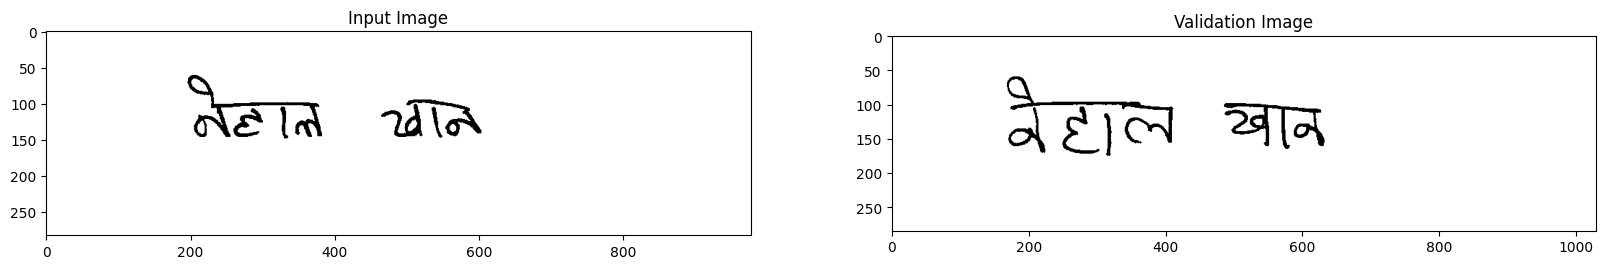

In [ ]:
visualize_sample_signature()

# Building the model:

we will build the siamese model and train it with 2 different types of losses:
- Contrastive loss
- Triplet loss

###Preparing data
Siamese Network has two identical sub-networks, one for the **input image** and other for the **validation image**.

For contrastive loss functions, the dataset should be in the form
- (anchor_image,positive_image,1)
- (anchor_image,negative_image,0)

> Since anchor image and positive image are same, it is similar. So the label is 1

> Anchor image and negative image are dis-similar. So the label is 0


In [ ]:
pairs_data = tf.data.Dataset.from_tensor_slices((inp_imgs,val_imgs))
pairs_labels = tf.data.Dataset.from_tensor_slices(labels)
data = tf.data.Dataset.zip((pairs_data,pairs_labels))

In [ ]:
data

<ZipDataset element_spec=((TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None)), TensorSpec(shape=(), dtype=tf.int32, name=None))>

###Preprocessing the data
Let's start preprocessing the Dataset required for **contrastive loss**.

In [ ]:
def preprocess_image(filename):
    # Read Image from the file path
    image_string = tf.io.read_file(filename)
    # Decodes a .tiff encoded image tensor of RGBA format (Output shape-[height,width,4])
    image = tfio.experimental.image.decode_tiff(image_string)
    # Selecting only the 3 channels of the image - RGB
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    # Combines multiple tensors
    image = tf.stack([r,g,b],axis=-1)
    # Resizing the image
    image = tf.image.resize(image, (180,180))
    return image

In [ ]:
preprocess_image('./signatures/BHSig260/Hindi/001/H-S-1-G-01.tif').shape

TensorShape([180, 180, 3])

**preprocess_image()**

- Reads Image
- Converts .tiff to tensor
- resizes the image to size (180,180)

**preprocess_twin**
- Returns **(input_image,validation_image,label)**


Function to preprocess image and return the tuple consisting of 

(input_image,validation_image,label)

In [ ]:
# We will use the same preprocess_image() function to preprocess the image
def preprocess_twin(img_pair,label):
  input_img = img_pair[0]
  validation_img = img_pair[1]
  return {
      'input_img':preprocess_image(input_img),
      'validation_img':preprocess_image(validation_img)
    }, label

In [ ]:
example = data.as_numpy_iterator().next()

In [ ]:
len(example)

2

In [ ]:
example[0][0]

b'./signatures/BHSig260/Hindi/001/H-S-1-G-01.tif'

Installing tensorflow_io for decoding .tiff images using tensorflow

- **.shuffle()** - shuffles the samples in the dataset.

- **.map()** - transforms items in the dataset

In [ ]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=len(data))

#### Training and Testing Partition of data

In [ ]:
# Training Partition
train_data = data.take(round(len(data)*0.8))
train_data = train_data.batch(4)
train_data = train_data.prefetch(2)

In [ ]:
val_data = data.skip(round(len(data)*0.8))
val_data = val_data.take(round(len(data)*0.15))
val_data = val_data.batch(4)
val_data = val_data.prefetch(2)

In [ ]:
# Testing partition
test_data = data.skip(round(len(data)*0.95))
test_data = test_data.take(round(len(data)*0.5))
test_data = test_data.batch(4)
test_data = test_data.prefetch(2)

In [ ]:
len(train_data),len(val_data),len(test_data)

(1793, 337, 112)

Now, We have pre-processed the dataset and splitted into training and test partitions. 

As we saw above, siamese network is a **twin network** which computes the similarity between the feature embeddings of the two images.


### How can we extract the embeddings from the image?

- We can use CNN (Convolutional Neural Network) for extracting the Image features.
- Since the siamese model is a **twin network** which means, their identical subnetworks have same configuration with same parameters and weights.
- So our base CNN model should be same.


#### **Quiz-2**
<img src="https://drive.google.com/uc?id=1i5vKKxSMKAQC9GTeSShOljdneh9RRCw0">

Which of the following do you agree with the most?

(a) This depicts two "different" neural networks with different architectures although we use the same drawing.

(b) Although we depict two neural networks and two images are combined in a single volume and pass through a single neural network

(c) The upper and lower neural networks depicted have exactly the same parameters

(d) The two neural networks depicted in the image have the same architecture, but they might have different parameters

**Ans:** (c) The upper and lower neural networks depicted have exactly the same parameters

**Explanation:** 

- Siamese network contains two or more identical subnetwork which is also known as twin neural network.

- These networks are used to find the similarity of the inputs by comparing their feature vectors 

- The two subnetworks are a mirror image of each other, just like the Siamese twins. Hence, any change to any subnetworks architecture, parameter, or weights is also applied to the other subnetwork.

###What should be the base CNN network?
- You can create Convolutions network from scratch extract features embeddings from the image.

- we can take the advantage of **pretrained models**

- Pretrained-models(Transfer learning) - You can also use pre-trained models like VGG16, Resnet50 to extract the feature embeddings.

- We will use the  pre-trained model **Resnet50** to train the embeddings to identify similar and dissimilar signatures
- ResNet-50 is a CNN that is 50 layers deep. It has been trained on millions of images from imagenet database and handles vanishing gradient problem in very deep CNNs.

In [ ]:
input_dim = (180,180,3)

In [ ]:
base_cnn = resnet.ResNet50(
    weights="imagenet", input_shape=input_dim, include_top=False
)

base_cnn.trainable=False

glob_pool = layers.GlobalAveragePooling2D()(base_cnn.output)
dense1 = layers.Dense(128)(glob_pool)
output = layers.Dense(128)(dense1)

embedding = Model(base_cnn.input, output, name="Embedding")

# trainable = False
# for layer in base_cnn.layers:
#     if layer.name == "conv5_block1_out":
#         trainable = True
#     layer.trainable = trainable

94781440/94765736 [==============================] - 4s 0us/step


## How to compare the embeddings?:

- For that we will distance metric called 'Euclidean distance' to find how similar the two signatures are. 

- But you can also use Cosine similarity

Function to Calculate Euclidean distance to calculate similariity between the input image and the validation image:



In [ ]:
def euclidean_distance(vects):
    # Compute Euclidean Distance between two vectors
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

## Building the Siamese Model

In [ ]:
# Building Model for feature extraction

# Shape of the Input
img_a = Input(shape=input_dim,name='input_img')
img_b = Input(shape=input_dim,name='validation_img')


# Extracting embeddings of the image
feat_vecs_a = embedding(img_a)
feat_vecs_b = embedding(img_b)

# Calculating euclidean distance between the images
distance = Lambda(euclidean_distance)([feat_vecs_a, feat_vecs_b])
model = Model([img_a, img_b],distance)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Embedding (Functional)         (None, 128)          23866496    ['input_img[0][0]',              
                                                                  'validation_img[0][0]']     

Plotting the architecture of the siamese model

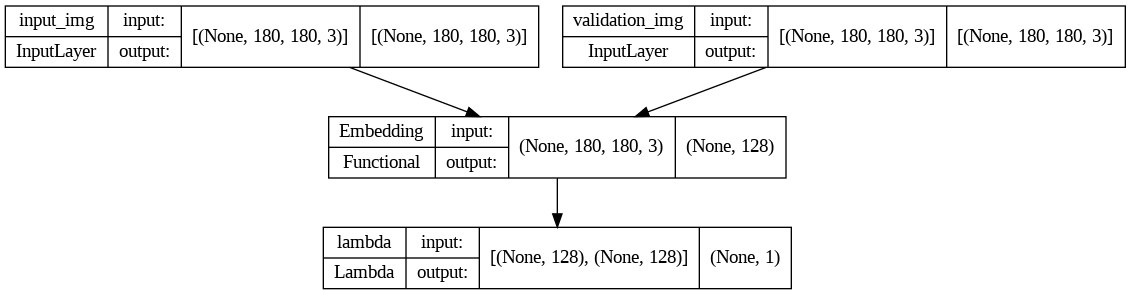

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

We have created the siamese model. Now lets understand what is contrastive loss ?

### 1.  **What is Contrastive loss?**
- Contrastive loss (also known as **pairwise ranking loss**) is a metric learning objective function where we learn from training data examples structured as pairs: 
 - Positive pairs (examples that belong to the same class)
 - Negative pairs (examples that belong to different classes).
- The contrastive loss function is set up such that we minimize the distance between embeddings for positive pairs, and maximize the distance between embeddings for negative pairs.
- After each pass through the network, we ideally want to update the weights of our embedding model such that the above condition is satisfied.
- Contrastive loss can be implemented using a Siamese network architecture for the embedding model.
- This model takes in two inputs and uses a shared trunk network that produces two embeddings for each input.

<center><img src="https://drive.google.com/uc?id=1Sn3YgCRgxj0Tu5J1_LkjZpYQq_6trudL" width=700 height=600>

### Why contrastive loss is used?

A siamese network's purpose is to distinguish between picture pairings rather than classify them. Essentially, contrastive loss measures how well the siamese network distinguishes between picture pairings. The distinction is minor yet significant.

Contrastive Loss is defined as,

> $Y*D^2+(1-Y)*max(margin-D,0)^2$


where $D$ is the calculated distance between embeddings for each datapoint in the pair, and $m$ is a constant value of margin.

To break this equation down:


1.   The Y value is our label. It will be 1 if the image pairs are of the same class, and it will be 0 if the image pairs are of a different class.

2.   The D variable is the Euclidean distance between the outputs of the sister network embeddings.
3.   The max function takes the largest value of 0 and the margin, m, minus the distance.


<center><img src="https://drive.google.com/uc?id=1G_SkYCor4w2o4wvpns1vQSO51vMPtKhi" width=700 height=500></center>

How the loss value changes during training the model?
- In the case of **positive pairs**, the loss becomes positive only when we have a positive distance between vector representations.
- In the case of **negative pairs**, the loss is positive only when the distance between vectors is less than the margin.
- The **margin value** is a hyperparameter that serves as an upper threshold to constrain the amount of loss attributed to “easy to classify” pairs.




In [ ]:
def contrastive_loss(y, preds, margin=1):
	y = tf.cast(y, preds.dtype)
	squaredPreds = K.square(preds)
	squaredMargin = K.square(K.maximum(margin - preds, 0))
	loss = K.mean(y * squaredPreds + (1 - y) * squaredMargin)
	return loss

Training the model with **Adam** optimizer and **contrastive** loss

In [ ]:
model.compile(loss=contrastive_loss, optimizer='adam')

In [ ]:
!mkdir Weights_binary

mkdir: cannot create directory ‘Weights_binary’: File exists


In [ ]:
callbacks = [
    ModelCheckpoint('./Weights_binary/signet-bhsig260-{epoch:03d}.h5', verbose=1, save_weights_only=True)
]

In [ ]:
results = model.fit(train_data,
                              steps_per_epoch = 50,
                              epochs = 20,
                              validation_data = val_data,
                              validation_steps = 50,
                              callbacks=callbacks
)

Epoch 1/20
49/50 [============================>.] - ETA: 0s - loss: 1.6935
Epoch 1: saving model to ./Weights_binary/signet-bhsig260-001.h5
50/50 [==============================] - 130s 142ms/step - loss: 1.6881 - val_loss: 1.3024
Epoch 2/20
49/50 [============================>.] - ETA: 0s - loss: 1.1840
Epoch 2: saving model to ./Weights_binary/signet-bhsig260-002.h5
50/50 [==============================] - 5s 92ms/step - loss: 1.1603 - val_loss: 0.8708
Epoch 3/20
49/50 [============================>.] - ETA: 0s - loss: 0.6620
Epoch 3: saving model to ./Weights_binary/signet-bhsig260-003.h5
50/50 [==============================] - 5s 93ms/step - loss: 0.6771 - val_loss: 0.6976
Epoch 4/20
49/50 [============================>.] - ETA: 0s - loss: 0.6459
Epoch 4: saving model to ./Weights_binary/signet-bhsig260-004.h5
50/50 [==============================] - 5s 97ms/step - loss: 0.6413 - val_loss: 0.9832
Epoch 5/20
49/50 [============================>.] - ETA: 0s - loss: 0.5364
Epoch 5: s

In [ ]:
# Downloading Best Model Weights
!gdown 1uuE37aN36fnp5s-7iSLShQSJw9sT_1Vs

Downloading...
From: https://drive.google.com/uc?id=1uuE37aN36fnp5s-7iSLShQSJw9sT_1Vs
To: /content/signet-bhsig260-020.h5
100% 95.7M/95.7M [00:02<00:00, 43.8MB/s]


In [ ]:
model.load_weights("/content/signet-bhsig260-020.h5")

Now, Let's compute the best threshold where the accuracy is maximum.

> **Accuracy = (tp + tn) / (tp + tn + fp + fn)**

- **TP** stands for True Positive, which is a case where the model correctly predicts a positive class when the true class is positive.

- **TN** stands for True Negative, which is a case where the model correctly predicts a negative class when the true class is negative.

- **FP** stands for False Positive, which is a case where the model incorrectly predicts a positive class when the true class is negative.

- **FN** stands for False Negative, which is a case where the model incorrectly predicts a negative class when the true class is positive.

> In other words, TP and TN represent correct predictions, while FP and FN represent incorrect predictions.

In [ ]:
# Finding out at which threshold, the accuracy is maximum
def compute_accuracy_thresh(predictions, labels):
    
    dmax = np.max(predictions)
    dmin = np.min(predictions)
    nsame = np.sum(labels == 1)
    ndiff = np.sum(labels == 0)
   
    step = 0.01
    max_acc = 0
    best_thresh = -1
    best_labels = None
   
    for d in np.arange(dmin, dmax+step, step):
        best_labels = (predictions <= d).astype(int)
    
    # Calculate tp, tn, fp, fn using best_labels and ground truth labels
        tp = np.sum((best_labels == 1) & (labels == 1))
        tn = np.sum((best_labels == 0) & (labels == 0))
        fp = np.sum((best_labels == 1) & (labels == 0))
        fn = np.sum((best_labels == 0) & (labels == 1))
        accuracy = (tp + tn) / (tp + tn + fp + fn)

        if accuracy > max_acc:
          max_acc = accuracy
          best_thresh = d
           
    return max_acc, best_thresh

In [ ]:
# Train predictions 
pred_train = []

# Train y
tr_y_train = []

In [ ]:
for i in range(len(train_data)):
    img_pair, label = train_data.as_numpy_iterator().next()
    tr_y_train.append(label.reshape(-1,1))
    pred_train.append(model.predict([img_pair]))

In [ ]:
pred_train[99]

array([[0.3255886 ],
       [1.5735033 ],
       [0.48276943],
       [1.0116113 ]], dtype=float32)

In [ ]:
tr_y_train[99]

array([[1],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
# Train accuracy, threshold
tr_acc, threshold = compute_accuracy_thresh(np.array(pred_train),np.array(tr_y_train))
tr_acc, threshold

(0.9256832124930284, 0.7347925364971166)

In [ ]:
# Test predictions 
pred_test = []

# Test y 
tr_y_test = []

In [ ]:
for i in range(len(test_data)):
    img_pair, label = test_data.as_numpy_iterator().next()
    tr_y_test.append(label.reshape(-1,1))
    pred_test.append(model.predict([img_pair])[0][0])

Now, we will compute the test accuracy using the train threshold

In [ ]:
# Computing Test Accuracy with the train threshold
def compute_accuracy_thresh_test(predictions, labels,d):
    
    best_labels = (predictions <= threshold).astype(int)
    tp = np.sum((best_labels == 1) & (labels == 1))
    tn = np.sum((best_labels == 0) & (labels == 0))
    fp = np.sum((best_labels == 1) & (labels == 0))
    fn = np.sum((best_labels == 0) & (labels == 1))
    accuracy = (tp + tn) / (tp + tn + fp + fn)
           
    return accuracy

In [ ]:
# Test Accuracy
test_acc= compute_accuracy_thresh_test(np.array(pred_test), np.array(tr_y_test),threshold)
test_acc

0.6381138392857143

### Prediction on Test image pairs

In [ ]:
def predict_score():
    '''Predict distance score and classify test images as Genuine or Forged'''
    test_point, test_label = test_data.as_numpy_iterator().next()
    img1, img2 = test_point['input_img'][0],test_point['validation_img'][0]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    ax1.imshow(img1.astype('uint8'), cmap='gray')
    ax2.imshow(img2.astype('uint8'), cmap='gray')

    ax1.set_title('Genuine')
    if test_label[0] == 1:
        ax2.set_title('Genuine')
    else:
        ax2.set_title('Forged')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    result = model.predict([test_point])
    diff = result[0][0]
    print("Difference Score = ", diff)
    if diff > threshold:
        print("Its a Forged Signature")
    else:
        print("Its a Genuine Signature")

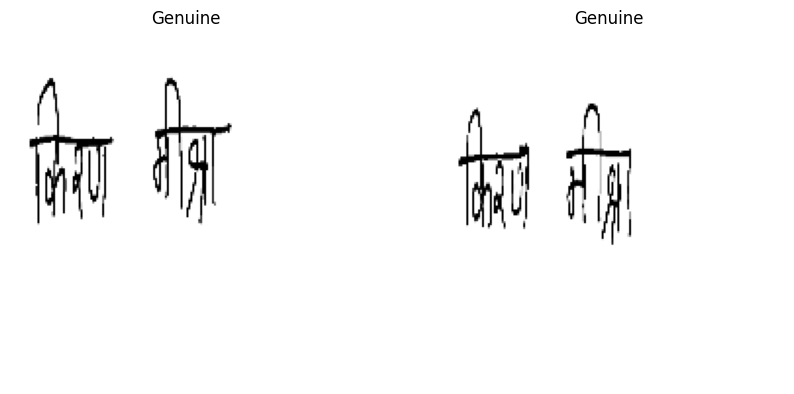

Difference Score =  0.97603726
Its a Forged Signature


In [ ]:
predict_score()

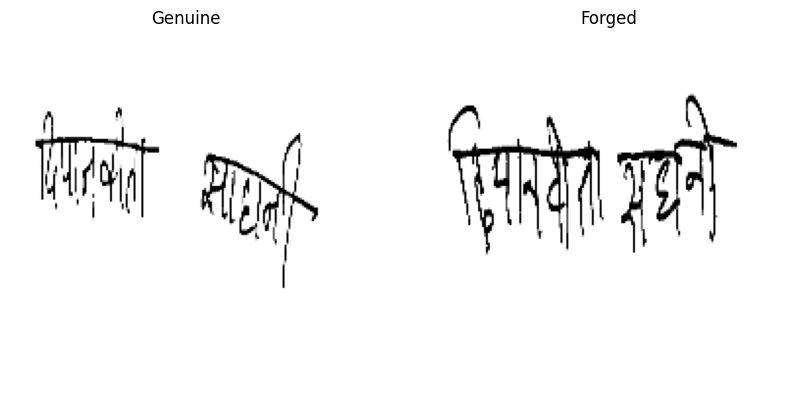

Difference Score =  2.373717
Its a Forged Signature


In [ ]:
predict_score()

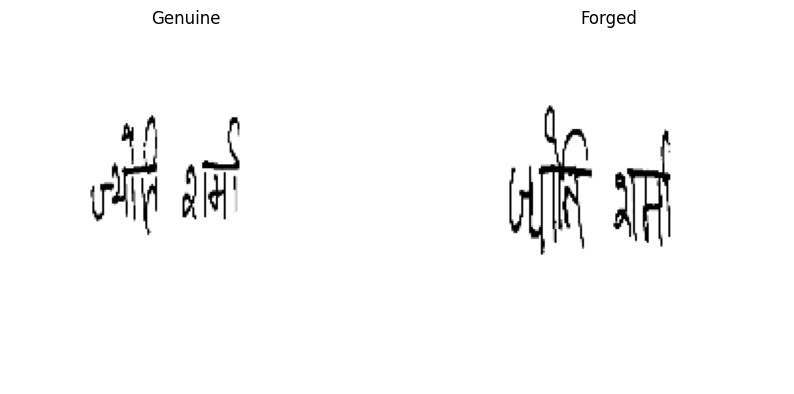

Difference Score =  0.82711715
Its a Forged Signature


In [ ]:
predict_score()

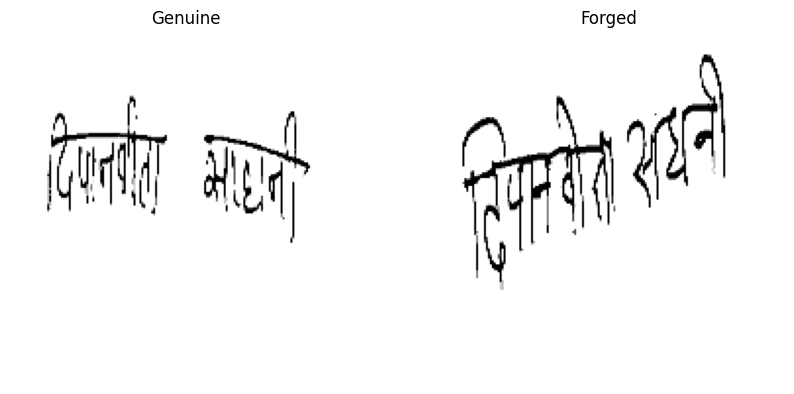

Difference Score =  1.5919282
Its a Forged Signature


In [ ]:
predict_score()

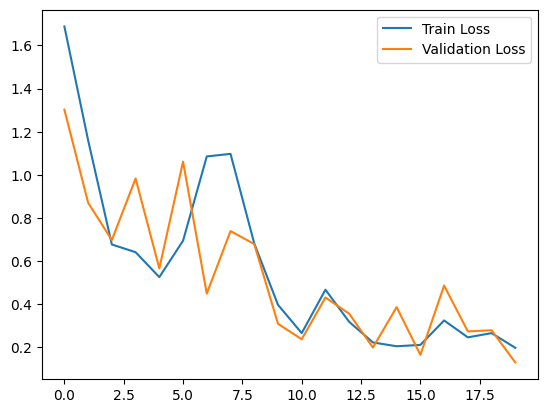

In [ ]:
# Train loss vs validation loss
plt.plot(results.history['loss'],label='Train Loss')
plt.plot(results.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

**Train Accuracy**: 92%

**Test Accuracy**: 63%

**Threshold**: 0.73


> As we discussed above, Contrastive loss requires 2 inputs, **(anchor, positive)** or **(anchor, negative)**.


### Why contrastive loss is not the best?

- While contrastive loss is useful, it has a limitation.
- In **Contrastive Loss**, it is already satisfied when different samples are easily distinguishable from similar ones.
- For points in a negative pair, contrastive loss will push them far apart without any knowledge of the broader embedding space.
- For example: imagine we have 10 classes, and each time we see class 1 and 2, we want to push them far apart; a result of this is that 1 might now become farther from 2 on the average, but might overlap with other classes (such as class 3, 4, 5, etc.)
- In **Triplet loss** it doesn't urge encoding anchor and positive sample in the same point within the vector space, unlike the contrastive loss.
- Also, it allows minor differences between similar samples from the same category.


#### How can we use triplet loss to solve this problem?

#### **Quiz-3**

The formula for the contrastive loss, the function that is used in the siamese network for calculating image similarity, is defined as following:

> $Y D^2+(1-Y)*max(margin-D,0)^2$

(a) Margin is a constant that we use to enforce a maximum distance between the two images in order to consider them similar or different from one another.

(b) Ds are 1 if images are similar, 0 if they are not.

(c) If the euclidean distance between the pair of images is low then it means the images are similar.

(d) Y is the tensor of details about image similarities.

**Answer:** (c),(d)

# **What is triplet loss?**

<center><img src="https://drive.google.com/uc?id=1iX5kKxAchdXX-JtSSnde4Lm-Z4m72AW-" width=600 height=400>

- The triplet loss function is an alternative to the contrastive loss function.
   - https://arxiv.org/pdf/1503.03832.pdf

- It has convergence advantages over contrastive loss function

- The triplet loss function compares a baseline input to positive input and a negative input in machine learning algorithms.

- For triplet loss, we need a triplet with 3 data points,
 - **Anchor (A):** The main data point.
 - **Positive (P):** A data point similar to Anchor.
  - **Negative (N):** A different data point than Anchor.

- The distance between the baseline input and the positive input is reduced to a minimum, while the distance between the baseline input and the negative input is increased.

> $(f(A)-f(P))^2<(f(A)-f(N))^2$

- In distance function terms, we can say the following:

> $d(A,P)-d(A,N)<0$

- As we don't want a Siamese network to learn $f(X)=0, X \in R$, we will add the margin, similar to a contrastive loss function:

> $d(A,P)-d(A,N)+\alpha<0$

- Using the following equations, we will define triplet loss as follows:

> $L(A,P,N)=max(0,d(A,P)-d(A,N)+\alpha)$

where $d(A,P)$ is anchor-to-positive-distance and $d(A,N)$ is anchor-to-negative-distance and $\alpha$ is the margin.

-  With this loss formulation, we can create three different types of triplet combinations based on how we sample:
 - **Easy triplets**: result when $d(A,N)>d(A,P)+\alpha$. Here, the sampled anchor-to-negative distance is already large enough so loss is 0, and the network has nothing to learn from.
 - **Hard triplets**: result when $d(A,N)<d(A,P)$. In this case, the anchor-to-negative distance is less than the anchor-to-positive distance, meaning high loss to backpropagation through the network.
 - **Semi-hard triplets**: result when $d(A,P)<d(A,N)<d(A,P)+\alpha$. Semi-hard triplets occur when the negative example is more distant to the anchor than the positive example, but the distance is not greater than the margin. This, therefore, results in a positive loss (i.e., the negative is far … but not far enough.)
<center><img src="https://drive.google.com/uc?id=1z4vkRXzcr-eZW3UMK5qN-2LAwIPbN6T0" width=400>

How the loss value changes during the training?

- The triplet loss function aims to learn a distance between representations such that the anchor-to-positive distance is less than the anchor-to-negative distance.
- Similar to contrastive loss, a margin value is imposed on the anchor-to-negative distance so that once negative representations have enough distance between them, no further effort is taken to increase distance between them. 

<center><img src="https://drive.google.com/uc?id=1Oge3dQ5TqQPmNnYyXRy85dRbC7l-_flr" width=600 height=400></center>

**Triplet Loss** is defined as

> $L(A,P,N)=max(0,d(A,P)-d(A,N)+\alpha)$

Now lets implement a custom function for triplet loss to understand how triplet loss works

In [ ]:
def triplet_loss(x):
    # Initialize alpha value
    alpha = 0.5
    # Getting anchor, positive and negative embeddings
    anchor, positive, negative = x
    # Calculating distance between anchor and positive
    positive_distance = K.mean(K.square(anchor - positive),axis=-1)
    # Calculating distance between anchor and negative
    negative_distance = K.mean(K.square(anchor - negative),axis=-1)
    # Implement the formula
    return K.mean(K.maximum(0.0, positive_distance - negative_distance + alpha))

- In triplet loss, we need images in the form of triplets (anchor,positive,negative) where anchor and postive are similar and negative is different.
- We will build a **tf.data()** pipeline to build the dataset required for triplet loss

- Now we know that triplet loss requires **anchor**,**positive** and **negative**, lets prepare the dataset

In [ ]:
# Collecting Anchor, positive and negative images
anchor_images = []
positive_images = []
negative_images = []

In [ ]:
# Consists of all forgery images
forg_groups_all = reduce(lambda x,y:x+y,forg_groups)

- We will use a simple loop to prepare the dataset

- **orig_groups** contains signatures for 160 persons, each person with 24 signatures.

- We know that anchor and positive should be similar, but with the same person.

- We will use **orig_groups** for anchor and positive images.

- **forg_groups** contains forgery signatures for all 160 persons.

- Since negative image should be different from **anchor** and **positive**. We will randomly pick a image from **forg_groups** and it will be negative for the triplet.

In [ ]:
def get_triplets():
  for i in range(len(orig_groups)):
    orig_gp = orig_groups[i]
    forg_gp = forg_groups[i]
    for j in range(len(orig_gp)):
      for k in range(j+1,len(orig_gp)):
        anchor = orig_gp[j]
        positive = orig_gp[k]
        negative = forg_groups_all[np.random.randint(len(forg_groups_all))]
        anchor_images.append(anchor)
        positive_images.append(positive)
        negative_images.append(negative)


In [ ]:
get_triplets()

In [ ]:
len(anchor_images),len(positive_images),len(negative_images)

(44160, 44160, 44160)

As you can see below, the positive and anchor image are same but the negative image is different. That's what we want

> **Note**: Anchor and positive are genuine signatures of the same person, but not same images

In [ ]:
print(anchor_images[0])
print(positive_images[0])
print(negative_images[0])

./signatures/BHSig260/Hindi/001/H-S-1-G-01.tif
./signatures/BHSig260/Hindi/001/H-S-1-G-02.tif
./signatures/BHSig260/Hindi/024/H-S-24-F-01.tif


Displaying a sample of anchor, positive and negative image

In [ ]:
k = np.random.randint(len(anchor_images))
a = anchor_images[k]
p = positive_images[k]
n = negative_images[k]
img1 = mpimg.imread(a)
img2 = mpimg.imread(p)
img3 = mpimg.imread(n)

Anchor Image

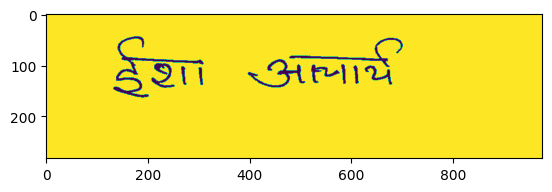

In [ ]:
plt.imshow(img1)

Positive Image

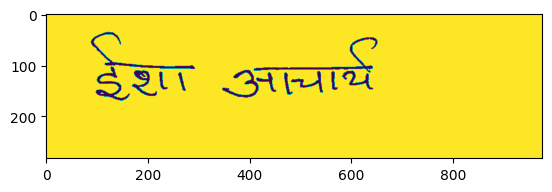

In [ ]:
plt.imshow(img2)

Negative Image

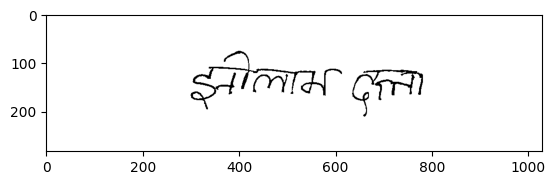

In [ ]:
plt.imshow(img3)

**tf.data.Dataset.zip()** is used for creating dataset by zipping together multiple arrays and tf objects.

In [ ]:
len(anchor_images)

44160

In [ ]:
anchor_dataset = tf.data.Dataset.from_tensor_slices(anchor_images[:20000])
positive_dataset = tf.data.Dataset.from_tensor_slices(positive_images[:20000])
negative_dataset = tf.data.Dataset.from_tensor_slices(negative_images[:20000])

In [ ]:
dataset = tf.data.Dataset.zip((anchor_dataset,positive_dataset,negative_dataset))

In [ ]:
dataset

<ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [ ]:
dataset.as_numpy_iterator().next()

(b'./signatures/BHSig260/Hindi/001/H-S-1-G-01.tif',
 b'./signatures/BHSig260/Hindi/001/H-S-1-G-02.tif',
 b'./signatures/BHSig260/Hindi/118/H-S-118-F-10.tif')

**preprocess_image()** - Load the specified file as a JPEG image, preprocess it and resize it to the target shape.

**preprocess_triplets** - Preprocess the image and return as a triplet

In [ ]:
def preprocess_triplets(anchor,positive,negative):
  return [
      preprocess_image(anchor),
      preprocess_image(positive),
      preprocess_image(negative),
  ]

Sample triplet of anchor,positve,negative

In [ ]:
sample = dataset.as_numpy_iterator().next()

In [ ]:
sample

(b'./signatures/BHSig260/Hindi/001/H-S-1-G-01.tif',
 b'./signatures/BHSig260/Hindi/001/H-S-1-G-02.tif',
 b'./signatures/BHSig260/Hindi/118/H-S-118-F-10.tif')

- **.shuffle()** - shuffles the samples in the dataset.

- **.map()** - transforms items in the dataset

In [ ]:
dataset = dataset.shuffle(buffer_size=len(dataset))
dataset = dataset.map(preprocess_triplets)

Taking 80% of dataset as training, 10% for validation, 10% for testing

In [ ]:
# Training Partition
train_data = dataset.take(round(len(dataset)*0.8))
train_data = train_data.batch(8)
train_data = train_data.prefetch(4)

In [ ]:
val_data = dataset.skip(round(len(dataset)*0.8))
val_data = val_data.take(round(len(dataset)*0.15))
val_data = val_data.batch(8)
val_data = val_data.prefetch(4)

In [ ]:
# Testing partition
test_data = dataset.skip(round(len(dataset)*0.95))
test_data = test_data.take(round(len(dataset)*0.5))
test_data = test_data.batch(8)
test_data = test_data.prefetch(4)

In [ ]:
len(train_data),len(val_data),len(test_data)

(2000, 375, 125)

In [ ]:
example = train_data.as_numpy_iterator().next()

**Visualize a few triplets from the supplied batches.**

In [ ]:
def visualize(triplet):

    def show(ax, image):
        ax.imshow(image)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(30, 40))

    # show(axs[0, 0], np.clip(triplet[0][0],0,1))
    # show(axs[0, 1], np.clip(triplet[1][0],0,1))
    # show(axs[0, 2], np.clip(triplet[2][0],0,1))
    plt.subplot(1,3,1)
    plt.imshow(triplet[0][0].astype('uint8'))

    plt.subplot(1,3,2)
    plt.imshow(triplet[1][0].astype('uint8'))

    plt.subplot(1,3,3)
    plt.imshow(triplet[2][0].astype('uint8'))


In [ ]:
sample = train_data.as_numpy_iterator().next()

In [ ]:
len(sample[0])

8

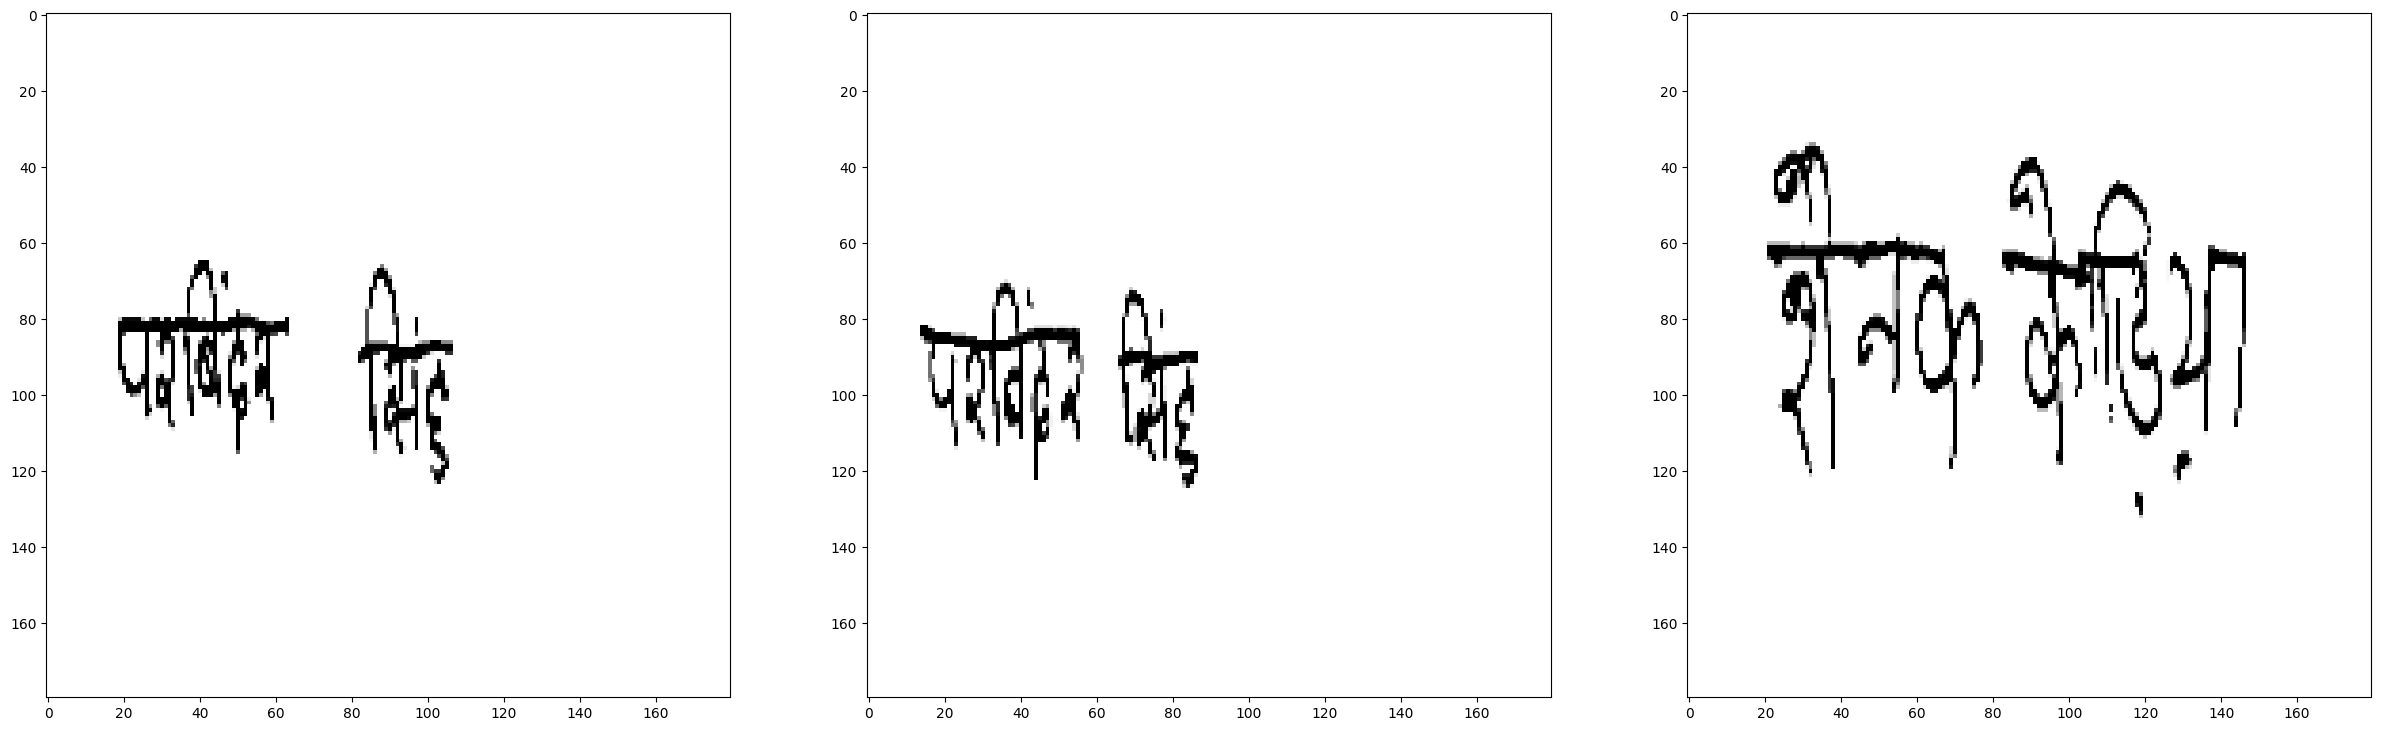

In [ ]:
visualize(sample)

Now lets build the Base CNN for extracting embeddings from the images

As we know that, we can build the Base CNN using the following ways

 - CNN from scratch
 - Using Pre-trained models (Transfer learning)

For contrastive loss, we had used ResNet-50 as Base CNN to extract embedding. Now lets use the same embeddings

**Note:** Try different pre-trained models to check the performance of the model

As we already know, the triplets can be classified as:
- Easy triplets
- Hard triplets
- Semi-Hard triplets

### Which triplets are suitable for training the model?
- In **easy triplets**, the negative sample is already sufficiently distant to the anchor sample respect to the positive sample in the embedding space.
- So easy triplets should be avoided, since their resulting loss will be 0.
- Since the loss is 0, there's no information available to adjust the weights of the model during training.
- Instead, we want to focus on the triplets with the most information, these are the so-called **hard triplets**.


In [ ]:
target_shape=(180,180,3)

In [ ]:
# Embedding
base_cnn = resnet.ResNet50(
    weights="imagenet", input_shape=target_shape, include_top=False
)

base_cnn.trainable=False

glob_pool = layers.GlobalAveragePooling2D()(base_cnn.output)
dense1 = layers.Dense(128)(glob_pool)
dense2 = layers.Dropout(0.2)(dense1)
output = layers.Dense(180)(dense2)


embedding = Model(base_cnn.input, output, name="Embedding")
embedding.summary()

94781440/94765736 [==============================] - 3s 0us/step
Model: "Embedding"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormaliza

In [ ]:
# Inputs for Anchor, positive and negative images
anchor_in = Input(name='anchor',shape=target_shape)
pos_in = Input(name='positive',shape=target_shape)
neg_in = Input(name='negative',shape=target_shape)

# Extract embeddings using VGG19
anchor_out = embedding(anchor_in)
pos_out = embedding(pos_in)
neg_out = embedding(neg_in)

# Define the model
model_triplet_loss = Model(inputs=[anchor_in, pos_in, neg_in], outputs=[anchor_out,pos_out,neg_out])

model_triplet_loss.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 anchor (InputLayer)            [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 positive (InputLayer)          [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 negative (InputLayer)          [(None, 180, 180, 3  0           []                               
                                )]                                                            

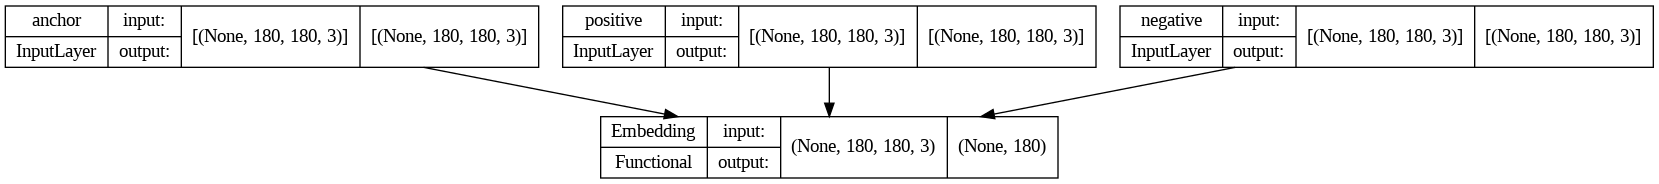

In [ ]:
plot_model(model_triplet_loss, to_file='model_triplet_loss_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
class SiameseModel(Model):

  """The Siamese Network model with a custom training and testing loops.

    Computes the triplet loss using the three embeddings produced by the
    Siamese Network.

    The triplet loss is defined as:
       L(A, P, N) = max(‖f(A) - f(P)‖² - ‖f(A) - f(N)‖² + margin, 0)
    """
    

  def __init__(self, siamese_network, margin=0.5):
      super().__init__()
      self.siamese_network = siamese_network
      self.margin = margin
      self.loss_tracker = metrics.Mean(name='loss')
        
  def call(self, inputs):
      return self.siamese_network(inputs)
    
  def train_step(self, data):
    # GradientTape is a context manager that records every operation that
    # you do inside. We are using it here to compute the loss so we can get
    # the gradients and apply them using the optimizer specified in
    # `compile()`.

    with tf.GradientTape() as tape:

      loss = self._compute_loss(data)

      # Storing the gradients of the loss function with respect to the
      # weights/parameters.

      gradients = tape.gradient(loss,self.siamese_network.trainable_weights)

      # Applying the gradients on the model using the specified optimizer
      self.optimizer.apply_gradients(
                    zip(gradients,self.siamese_network.trainable_weights)
        )
        
      # Let's update and return the training loss metric
      self.loss_tracker.update_state(loss)
      return {"loss": self.loss_tracker.result()}
    
  def test_step(self, data):
    loss = self._compute_loss(data)
    # Let's update and return the loss metric.
    self.loss_tracker.update_state(loss)
    return {"loss": self.loss_tracker.result()}
    
  def _compute_loss(self, data):
    # Computing Triplet loss
    anchor, positive, negative = self.siamese_network(data)
      
    # Computing the Triplet Loss by subtracting both distances and
    # making sure we don't get a negative value.
    pos_dist = tf.reduce_sum(tf.square(anchor-positive), -1)
    neg_dist = tf.reduce_sum(tf.square(anchor-negative), -1)
    loss = pos_dist - neg_dist + self.margin
    loss = tf.maximum(loss, 0.0)
    return loss 
    
  @property
  def metrics(self):
    return [self.loss_tracker]

In [ ]:
siamese_model = SiameseModel(model_triplet_loss)
siamese_model.compile(optimizer=Adam(learning_rate=0.0001))

# Training the model with triplet loss

In [ ]:
history = siamese_model.fit(train_data, validation_data=val_data, steps_per_epoch=len(train_data)//8,validation_steps = len(val_data)//8,
epochs=8) 

Epoch 1/8
250/250 [==============================] - 354s 1s/step - loss: 0.2702 - val_loss: 0.1995
Epoch 2/8
250/250 [==============================] - 295s 1s/step - loss: 0.1571 - val_loss: 0.1035
Epoch 3/8
250/250 [==============================] - 290s 1s/step - loss: 0.0756 - val_loss: 0.0395
Epoch 4/8
250/250 [==============================] - 291s 1s/step - loss: 0.0503 - val_loss: 0.0200
Epoch 5/8
250/250 [==============================] - 291s 1s/step - loss: 0.0558 - val_loss: 0.0091
Epoch 6/8
250/250 [==============================] - 290s 1s/step - loss: 0.0416 - val_loss: 0.0192
Epoch 7/8
250/250 [==============================] - 287s 1s/step - loss: 0.0286 - val_loss: 0.0235
Epoch 8/8
250/250 [==============================] - 287s 1s/step - loss: 0.0539 - val_loss: 0.0337


In [ ]:
# Test Data 1 batch (8 triplets)
ex = test_data.as_numpy_iterator().next()

In [ ]:
# Prediction on the batch
pred = model_triplet_loss.predict(ex)

In [ ]:
# Anchor_embedding, Positive_embedding, Negative_embedding
len(pred)

3

In [ ]:
pred

[array([[-0.18165532, -0.01127734, -0.41549936, ...,  1.0264239 ,
          1.029173  , -1.168249  ],
        [-0.29189098, -0.5102162 , -0.6016116 , ...,  1.1212022 ,
          1.1699909 , -0.9405261 ],
        [-0.38871962, -1.0892869 , -0.856663  , ...,  1.1111906 ,
          1.3112628 , -0.5856014 ],
        ...,
        [-0.32291362, -0.7183758 , -0.5827936 , ...,  0.87637997,
          0.838137  , -0.96092373],
        [-0.35878763, -0.19607343, -0.53909385, ...,  1.1087539 ,
          0.72266895, -0.75952893],
        [-0.3944704 , -0.01297501, -0.34103853, ...,  1.0844094 ,
          1.3897988 , -1.1090544 ]], dtype=float32),
 array([[-0.30546525, -0.1494567 , -0.17801382, ...,  1.1216469 ,
          1.056752  , -1.0262917 ],
        [-0.34972653, -0.37935475, -0.39168078, ...,  0.990515  ,
          1.0698944 , -1.0171262 ],
        [-0.18859763, -0.645838  , -0.56457204, ...,  1.1395599 ,
          0.6515228 , -0.75346917],
        ...,
        [-0.47171775, -0.49214643, -0.5

- At this point, we can check how the network learned to separate the embeddings depending on whether they belong to similar images.

- We can use **Euclidean Distance** to measure the similarity between embeddings.

- Let's pick a batch from the test dataset to check the similarity between the embeddings generated for each image.

- Finally, we can compute the Euclidean between the anchor and positive images and compare it with the similarity between the anchor and the negative images.

- We should expect the similarity between the anchor and positive images to be larger than the similarity between the anchor and the negative images.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances as L2

In [ ]:
# Distance between anchor and positive
pos = L2(pred[0][0].reshape(1,-1),pred[1][0].reshape(1,-1))
# Distance between anchor and negative
neg = L2(pred[0][0].reshape(1,-1),pred[2][0].reshape(1,-1))

In [ ]:
pos

array([[1.5746156]], dtype=float32)

In [ ]:
neg

array([[3.013498]], dtype=float32)

Lets Calculate Euclidean distance for 8 triplets`

In [ ]:
pos_pred = []
neg_pred = []

In [ ]:
for i in range(len(pred[0])):
  # Distance between anchor anf positive
  pos = L2(pred[0][i].reshape(1,-1),pred[1][i].reshape(1,-1))[0][0]
  # Distance between anchor and negative
  neg = L2(pred[0][i].reshape(1,-1),pred[2][i].reshape(1,-1))[0][0]
  pos_pred.append(pos)
  neg_pred.append(neg)

In [ ]:
test_pred = pd.DataFrame({'Anchor-positive':pos_pred,'Anchor-negative':neg_pred})

In [ ]:
test_pred

,Anchor-positive,Anchor-negative
0,1.574616,3.013498
1,1.292365,3.372607
2,3.007544,4.257898
3,3.142259,4.422088
4,2.462783,5.245543
5,1.603716,2.650132
6,1.237521,2.522765
7,1.180487,3.474951


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

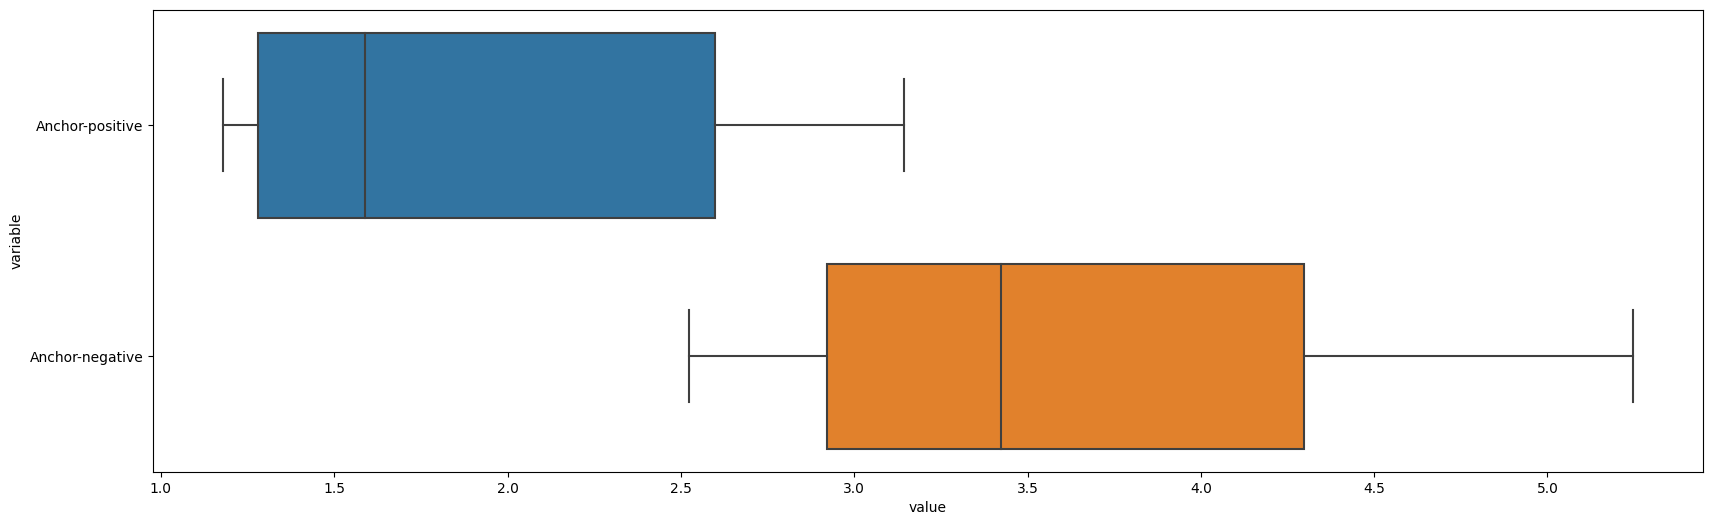

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x="value", y="variable", data=pd.melt(test_pred[['Anchor-positive','Anchor-negative']]))
plt.rc('font', size=20)
plt.show()

Threshold of 2.5 gives correct decisions 75% of the time, so let's go with that. You can try out different values as well.

In [ ]:
len(test_pred[(test_pred['Anchor-positive']<2.5) & (test_pred['Anchor-negative']>2.5)])/len(test_pred)

0.75

### Extraction of Embeddings Model from Siamese Network
Since we don't want to use the three input-three output siamese model every time we are required to create embeddings, we will extract the embeddings network from the model and use it to create embeddings for our future tasks

In [ ]:
model_triplet_loss.layers

In [ ]:
signature_embeddings = model_triplet_loss.layers[-1]

In [ ]:
signature_embeddings.save("embeddings_triplet_loss.h5")

In [ ]:
signature_embeddings.save_weights("embeddings_triplet_loss_weights.h5")

In [ ]:
# Downloading best model and weights

!gdown 1FLM_wpWtyxQAuUv_a4f0_KsPyUlJD251
!gdown 19-QvHIZ4hDea8etuIAAnIaM81_g6XymA

Downloading...
From: https://drive.google.com/uc?id=1FLM_wpWtyxQAuUv_a4f0_KsPyUlJD251
To: /content/embeddings_triplet_loss.h5
100% 96.0M/96.0M [00:03<00:00, 28.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=19-QvHIZ4hDea8etuIAAnIaM81_g6XymA
To: /content/embeddings_triplet_loss_weights.h5
100% 95.9M/95.9M [00:07<00:00, 12.2MB/s]


In [ ]:
# Loading the
signature_embeddings = tf.keras.models.load_model("/content/embeddings_triplet_loss.h5")
signature_embeddings.load_weights("/content/embeddings_triplet_loss_weights.h5")

Now let's use the image pairs from **Hindi_pairs.txt**, to compute the accuracy and the threshold

In [ ]:
pred_distances = []

In [ ]:
for i in range(len(inp_imgs)):
  inp_feat = preprocess_image(inp_imgs[i])
  val_feat = preprocess_image(val_imgs[i])
  res = L2(signature_embeddings.predict(np.expand_dims(inp_feat,axis=0)),signature_embeddings.predict(np.expand_dims(val_feat,axis=0)))
  pred_distances.append(res)

In [ ]:
len(pred_distances)

8964

In [ ]:
pairs['distance'] = pred_distances

In [ ]:
distances = []

In [ ]:
for idx,row in pairs.iterrows():
  dist = row['distance'][0][0]
  distances.append(dist)

In [ ]:
pairs['distance'] = distances

In [ ]:
pairs.head()

,0,1,2,distance
0,001/H-S-1-G-01.tif,001/H-S-1-F-01.tif,0,3.452085
1,001/H-S-1-G-02.tif,001/H-S-1-F-01.tif,0,3.729099
2,001/H-S-1-G-03.tif,001/H-S-1-F-01.tif,0,3.511362
3,001/H-S-1-G-04.tif,001/H-S-1-F-01.tif,0,3.308646
4,001/H-S-1-G-05.tif,001/H-S-1-F-01.tif,0,3.313268


In [ ]:
pairs.to_csv("pairs_new.csv")

In [ ]:
pairs_new = pd.read_csv("pairs_new (1).csv")

In [ ]:
pairs_new

,Unnamed: 0,0,1,2,distance
0,0,001/H-S-1-G-01.tif,001/H-S-1-F-01.tif,0,3.452085
1,1,001/H-S-1-G-02.tif,001/H-S-1-F-01.tif,0,3.729099
2,2,001/H-S-1-G-03.tif,001/H-S-1-F-01.tif,0,3.511362
3,3,001/H-S-1-G-04.tif,001/H-S-1-F-01.tif,0,3.308646
4,4,001/H-S-1-G-05.tif,001/H-S-1-F-01.tif,0,3.313268
...,...,...,...,...,...
8959,8959,009/H-S-9-G-23.tif,009/H-S-9-G-21.tif,1,1.505491
8960,8960,009/H-S-9-G-24.tif,009/H-S-9-G-21.tif,1,1.743614
8961,8961,009/H-S-9-G-23.tif,009/H-S-9-G-22.tif,1,2.071266
8962,8962,009/H-S-9-G-24.tif,009/H-S-9-G-22.tif,1,1.365509


In [ ]:
genuine_imgs = pairs_new[pairs_new.iloc[:,3]==1].values
forgery_imgs = pairs_new[pairs_new.iloc[:,3]==0].values

In [ ]:
genuine_imgs

array([[720, '001/H-S-1-G-02.tif', '001/H-S-1-G-01.tif', 1, 1.1974713],
       [721, '001/H-S-1-G-03.tif', '001/H-S-1-G-01.tif', 1, 1.9371067],
       [722, '001/H-S-1-G-04.tif', '001/H-S-1-G-01.tif', 1, 1.7605009],
       ...,
       [8961, '009/H-S-9-G-23.tif', '009/H-S-9-G-22.tif', 1, 2.0712662],
       [8962, '009/H-S-9-G-24.tif', '009/H-S-9-G-22.tif', 1, 1.3655095],
       [8963, '009/H-S-9-G-24.tif', '009/H-S-9-G-23.tif', 1, 1.7338386]],
      dtype=object)

In [ ]:
forgery_imgs

array([[0, '001/H-S-1-G-01.tif', '001/H-S-1-F-01.tif', 0, 3.4520848],
       [1, '001/H-S-1-G-02.tif', '001/H-S-1-F-01.tif', 0, 3.7290986],
       [2, '001/H-S-1-G-03.tif', '001/H-S-1-F-01.tif', 0, 3.5113618],
       ...,
       [8685, '009/H-S-9-G-22.tif', '009/H-S-9-F-30.tif', 0, 3.7266493],
       [8686, '009/H-S-9-G-23.tif', '009/H-S-9-F-30.tif', 0, 3.2013102],
       [8687, '009/H-S-9-G-24.tif', '009/H-S-9-F-30.tif', 0, 3.3176167]],
      dtype=object)

### Now Lets visualize the Embeddings

In [ ]:
# Visualizing 1 Genuine Signature pair
genuine_results = []
img1 = preprocess_image(path+genuine_imgs[0][1])
img2 = preprocess_image(path+genuine_imgs[0][2])
embed1 = signature_embeddings.predict(np.expand_dims(img1,axis=0))
embed2 = signature_embeddings.predict(np.expand_dims(img2,axis=0))
genuine_results.append(embed1)
genuine_results.append(embed2)

In [ ]:
genuine_results = np.array(genuine_results)

In [ ]:
genuine_results.shape

(2, 1, 180)

In [ ]:
# Save embeddings for visualization in projector
np.savetxt("vecs.tsv", genuine_results.reshape((2,-1)), delimiter='\t')

<img src="https://drive.google.com/uc?id=1ou8doUGGF3M8YpHNM-W7yjRE4ZCkYSx7" width=600>

In [ ]:
# Visualizing 1 Forgery Signature pair
forgery_results = []
img1 = preprocess_image(path+forgery_imgs[0][1])
img2 = preprocess_image(path+forgery_imgs[0][2])
embed1 = signature_embeddings.predict(np.expand_dims(img1,axis=0))
embed2 = signature_embeddings.predict(np.expand_dims(img2,axis=0))
forgery_results.append(embed1)
forgery_results.append(embed2)

In [ ]:
forgery_results = np.array(forgery_results)

In [ ]:
forgery_results.shape

(2, 1, 180)

In [ ]:
# Save embeddings for visualization in projector
np.savetxt("vecs_forgery.tsv", forgery_results.reshape((2,-1)), delimiter='\t')

<img src="https://drive.google.com/uc?id=119ggTHKoBIB6rTq3c0_qMQcnpkbPF48_" width=600>

Similar signatures have less euclidean distance, while the different signatures have comparatively higher euclidean distance

Now lets split the data into two sets

- to compute the threshold and accuracy in the first set of data
- Use the same threshold to find the accuracy in the test set

In [ ]:
labels = pairs_new.iloc[:,3].values
dist = pairs_new['distance'].values

In [ ]:
from sklearn.model_selection import train_test_split

dist_train,dist_test,labels_train,labels_test = train_test_split(dist,labels,test_size=0.2,random_state=42)

In [ ]:
def compute_accuracy_thresh(predictions, labels):
    
    dmax = np.max(predictions)
    dmin = np.min(predictions)
    nsame = np.sum(labels == 1)
    ndiff = np.sum(labels == 0)
   
    step = 0.01
    max_acc = 0
    best_thresh = -1
    best_labels = None
   
    for d in np.arange(dmin, dmax+step, step):
       
        best_labels = (predictions <= d).astype(int)
    
    # Calculate tp, tn, fp, fn using best_labels and ground truth labels
        tp = np.sum((best_labels == 1) & (labels == 1))
        tn = np.sum((best_labels == 0) & (labels == 0))
        fp = np.sum((best_labels == 1) & (labels == 0))
        fn = np.sum((best_labels == 0) & (labels == 1))
        accuracy = (tp + tn) / (tp + tn + fp + fn)

        if accuracy>max_acc:
          max_acc = accuracy
          best_thresh = d
           
    return max_acc, best_thresh

In [ ]:
acc,thresh = compute_accuracy_thresh(dist_train,labels_train)

In [ ]:
# Accuracy
acc

0.8266629479849393

In [ ]:
# Threshold
thresh

2.050474880000001

Now lets use the same threshold to find the accuracy of the test set

In [ ]:
# Computing Test Accuracy with the train threshold
def compute_accuracy_thresh_test(predictions, labels,d):
    
    best_labels = (predictions <= d).astype(int)
    tp = np.sum((best_labels == 1) & (labels == 1))
    tn = np.sum((best_labels == 0) & (labels == 0))
    fp = np.sum((best_labels == 1) & (labels == 0))
    fn = np.sum((best_labels == 0) & (labels == 1))
    accuracy = (tp + tn) / (tp + tn + fp + fn)
           
    return accuracy

In [ ]:
# Test Accuracy
test_acc= compute_accuracy_thresh_test(np.array(dist_test), np.array(labels_test),thresh)
test_acc

0.8248745119910764

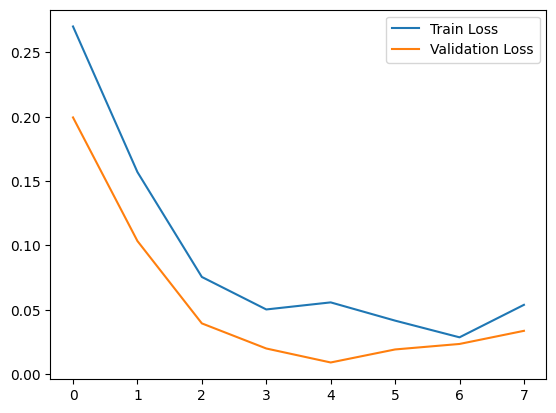

In [ ]:
# Train loss vs validation loss
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

### Contrastive Loss Vs Triplet Loss

<table>
  <tr>
    <th>Loss</th>
    <th>Train Accuracy</th>
    <th>Test Accuracy</th>
  </tr>
  <tr>
    <td>Contrastive Loss</td>
    <td>92.56</td>
    <td>63.81</td>
  </tr>
  <tr>
    <td>Triplet Loss</td>
    <td>82.66</td>
    <td>82.48</td>
  </tr>
</table>

> **Note:** Due to insufficent memory and GPu in colab, the model with triplet loss has been trained only using 20,000 triplets out of 44,000 triplets. The performance of the model can be improved by training with more samples.

## Summary

- A **Siamese neural network** is an artificial neural network that contains two or more identical subnetwork which is also known as twin neural network or sister network.

- Siamese network takes two different inputs passed through two similar subnetworks with the same architecture, parameters, and weights.

- Siamese network’s objective is to classify if the two inputs are the same or different using the Similarity score.

- The Similarity score can be calculated using **Contrastive function**, or **Triplet loss**, which are techniques for the general distance metric learning approach.

- Since training of Siamese networks involves pairwise learning usual, Cross entropy loss cannot be used in this case, mainly two loss functions are used, they are
 - **Contrastive loss**
 - **Triplet loss**

- **Contrastive loss** is a metric learning objective function where we learn from training data examples structured as pairs:
 - Positive pairs (examples that belong to the same class)
 - Negative pairs (examples that belong to different classes).

- The contrastive loss function is set up such that we minimize the distance between embeddings for positive pairs, and maximize the distance between embeddings for negative pairs.

- The **triplet loss** function is an alternative to the contrastive loss function. It has convergence advantages over contrastive loss function

- The distance between the baseline input and the positive input is reduced to a minimum, while the distance between the baseline input and the negative input is increased.

- The triplet loss function aims to learn a distance between representations such that the anchor-to-positive distance is less than the anchor-to-negative distance.